In [217]:
import pandas as pd
import geopandas as gp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import shapely

In [218]:
prod = pd.read_csv("Data/Production Table.CSV")
perm = pd.read_csv("Data/PermitsTable.CSV")
leases = pd.read_csv("Data/LeasesTable.CSV")

#had to add GDAL_DATA variable to system variables and set value to the folder of gdal in C:\Users\mishaun\AppData\Local\Continuum\anaconda3\Library\share\gdal on my work computer
shapezipfile = ("zip://Data/BLMWY-2020-Q1-3_WGS84.zip")
shapedf = gp.read_file(shapezipfile, encoding = "utf-8")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,20,32,33,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [219]:
import os

In [220]:
'GDAL_DATA' in os.environ


False

In [221]:
shapedf.crs

{'init': 'epsg:3857'}

In [222]:
#converting crs to drillinginfo coord system
shapedf.to_crs(epsg = 26913, inplace = True)

In [223]:
shapedf["centroids"] = shapedf.centroid


In [224]:
shapedf.head()

,SaleParcel,lot_no,tract_id,short_code,label,geometry,centroids
0,WY-201Q-105,65012,2,BLMWY-2020-Q1-3,WY-2020-03-0374,"MULTIPOLYGON (((173527.819 4984155.461, 173534...",POINT (172183.913 4984182.822)
1,WY-201Q-063,64970,16,BLMWY-2020-Q1-3,WY-2020-03-6207,"MULTIPOLYGON (((219007.722 4650891.363, 218687...",POINT (222418.619 4647579.181)
2,WY-201Q-001,64908,93,BLMWY-2020-Q1-3,WY-2020-03-6613,"POLYGON ((562927.151 4797521.250, 563330.976 4...",POINT (563130.227 4797125.862)
3,WY-201Q-002,64909,102,BLMWY-2020-Q1-3,WY-2020-03-6660,"POLYGON ((514894.040 4607634.757, 515295.946 4...",POINT (515096.374 4607429.194)
4,WY-201Q-003,64910,89,BLMWY-2020-Q1-3,WY-2020-03-6585,"MULTIPOLYGON (((518971.985 4775132.462, 519376...",POINT (520545.083 4773447.285)


In [271]:
leasesgeo = gp.GeoDataFrame(leases, crs = {'init': 'epsg:4326'}, geometry=gp.points_from_xy(leases["Longitude (WGS84)"], leases["Latitude (WGS84)"]))

In [272]:
leasesgeo.head()

,State/Province,Effective Date,Record Date,Expiration of Primary Term,Term (Months),Grantor,Grantee Alias,Royalty,Bonus,Area (Acres),...,Majority Legal Assignee,DI Subplay,Min Depth,Majority Assignment Effective Date,Latitude (WGS84),DI Play,Majority Legal Assignee Interest,Longitude (WGS84),Majority Assignment Vol/Page,geometry
0,WY,2020-02-15,2020-02-18,2025-02-15,60,HEKHUIS LISA A,CARDINAL NATURAL RESOURCES,0.15,NaN,1196.530029,...,NaN,NaN,0.0,NaN,43.032311,GREEN RIVER - OVERTHRUST,NaN,-110.165357,NaN,POINT (-110.16536 43.03231)
1,WY,2020-02-15,2020-02-18,2025-02-15,60,HEKHUIS LISA A,CARDINAL NATURAL RESOURCES,0.15,NaN,1196.530029,...,NaN,NaN,0.0,NaN,43.032311,GREEN RIVER - OVERTHRUST,NaN,-110.165357,NaN,POINT (-110.16536 43.03231)
2,WY,2020-02-15,2020-02-18,2025-02-15,60,HEKHUIS LISA A,CARDINAL NATURAL RESOURCES,0.15,NaN,1196.530029,...,NaN,NaN,0.0,NaN,43.032311,GREEN RIVER - OVERTHRUST,NaN,-110.165357,NaN,POINT (-110.16536 43.03231)
3,WY,2020-02-15,2020-02-18,2025-02-15,60,HEKHUIS LISA A,CARDINAL NATURAL RESOURCES,0.15,NaN,1196.530029,...,NaN,NaN,0.0,NaN,43.032311,GREEN RIVER - OVERTHRUST,NaN,-110.165357,NaN,POINT (-110.16536 43.03231)
4,WY,2020-02-15,2020-02-18,2025-02-15,60,HEKHUIS LISA A,CARDINAL NATURAL RESOURCES,0.15,NaN,1196.530029,...,NaN,NaN,0.0,NaN,43.017853,GREEN RIVER - OVERTHRUST,NaN,-110.165288,NaN,POINT (-110.16529 43.01785)


latlongs = prod[["Surface Latitude (WGS84)", "Surface Longitude (WGS84)"]]

latlongs = gp.GeoDataFrame(latlongs, crs = coordSystem, geometry=gp.points_from_xy(latlongs.iloc[:,1], latlongs.iloc[:,0]))

## Shapefile Downloads from DI


In [265]:
#this is shapefile downloaded from drillinginfo holding well information
prodshp = gp.read_file("zip://Data/production.ZIP")
prodshp.to_crs(epsg = 26913, inplace = True)
prodshp.crs

{'init': 'epsg:26913', 'no_defs': True}

In [266]:
permitshp = gp.read_file("zip://Data/permits.ZIP")
permitshp.to_crs(epsg = 26913, inplace = True)
permitshp.crs

{'init': 'epsg:26913', 'no_defs': True}

In [273]:
leasesgeo.crs


{'init': 'epsg:4326'}

In [274]:
leasesgeo.to_crs(epsg = 26913, inplace = True)

In [227]:
converse = permitshp[permitshp["County"]=="CONVERSE (WY)"]

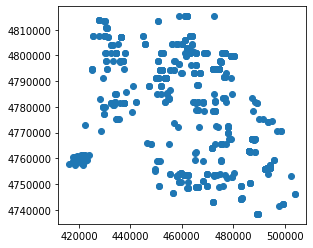

In [228]:
converse.plot()

In [229]:
shapedf.crs

{'init': 'epsg:26913', 'no_defs': True}

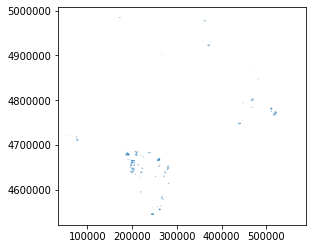

In [230]:
shapedf.plot()

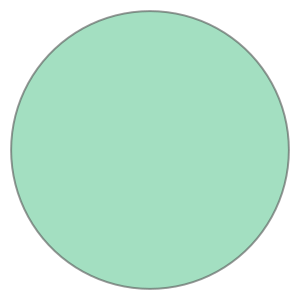

In [231]:
shapedf.centroids.iloc[0].buffer(10560,25)

In [313]:
shapedf["buffers"] = shapedf.centroids.apply(lambda x: x.buffer(4828,20))


In [314]:
permFiltered = permitshp.within(shapedf[shapedf["tract_id"] ==40]["buffers"].iloc[0])
prodFiltered = prodshp.within(shapedf[shapedf["tract_id"] ==40]["buffers"].iloc[0])
leasesFiltered = leasesgeo.within(shapedf[shapedf["tract_id"]==40]["buffers"].iloc[0])

In [315]:
permFiltered.value_counts()

False    46457
True        12
dtype: int64

In [316]:
permittoeval = permitshp.loc[permFiltered]

In [317]:
prodtoeval = prodshp.loc[prodFiltered]

In [318]:
prodFiltered.value_counts()

False    62874
True         6
dtype: int64

In [319]:
leasesFiltered.value_counts()

False    53264
True         2
dtype: int64

In [320]:
leasestoeval = leasesgeo.loc[leasesFiltered]

In [321]:
leasestoeval

,State/Province,Effective Date,Record Date,Expiration of Primary Term,Term (Months),Grantor,Grantee Alias,Royalty,Bonus,Area (Acres),...,Majority Legal Assignee,DI Subplay,Min Depth,Majority Assignment Effective Date,Latitude (WGS84),DI Play,Majority Legal Assignee Interest,Longitude (WGS84),Majority Assignment Vol/Page,geometry
4777,WY,NaN,2019-09-13,2020-08-23,12,PELLATZ ROBERT D ET AL,DEVON ENERGY,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,43.167017,POWDER RIVER,NaN,-105.389570,NaN,POINT (468332.890 4779435.622)
49813,WY,NaN,2014-08-05,2024-08-05,120,BLM,MBI O&G,0.125,3100.0,320.0,...,NaN,NaN,NaN,NaN,43.239942,POWDER RIVER,NaN,-105.388968,NaN,POINT (468419.520 4787533.967)


In [324]:
leasestoeval.describe()["Bonus"]["mean"]

3100.0